## Load Required Routines

In [1]:
using Gadfly, Optim

import Formatting              #do Pkg.add("Formatting") to install this package
include("printmat.jl")

printmat (generic function with 5 methods)

# Ch 4 Appendix: Numerical Optimization

## Optimization without Restrictions

In the next few cells, we 

(1) define a loss function and calculate it on a grid of values of the choice variables

(2) plot the contours of the loss function

(3) do a numerical minimization to find the optimal values

In [2]:
function objfun(p::Vector)
  L = (p[1]-2)^2 + (4*p[2]+3)^2
  return L
end

nx = 2*41
ny = 2*61
x = collect(linspace(1,4.5,nx))                 #QUADRATIC LOSS FUNCTION
y = collect(linspace(-1,-0.3,ny))
loss2d = fill(NaN,(length(x),length(y)))  #to put results in, initialized as NaNs
for i = 1:length(x)
  for j = 1:length(y)                      #create loss2 column by column
    loss2d[i,j] = objfun([x[i];y[j]])
  end
end

lossRestr = fill(NaN,length(x))  #to put results in, initialized as NaNs
for i = 1:length(x)
  y_i = (3-x[i])/2
  lossRestr[i] = objfun([x[i];y_i])
end

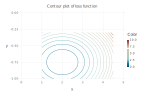

In [3]:
plot(z=loss2d,x=x,y=y,Geom.contour,
Guide.title("Contour plot of loss function"))

In [4]:
Sol = optimize(p->objfun(p),[0.0;0.0])

println("optimal solution:",Optim.minimizer(Sol))

optimal solution:[2.00001,-0.74999]


## Optimization with Restrictions

In the next few cells, we 

(1) plot the loss function together with the restriction
    
(2) redfine the loss function to also include the restriction

(3) solve and and plot the optimal values as we impose a higher and higher penalty on the restriction

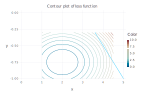

In [5]:
plot(layer(z=loss2d,x=x,y=y,Geom.contour),
layer(x=3-2*y,y=y,Geom.line),
Guide.title("Contour plot of loss function"))

In [6]:
function objfun2(p::Vector,lambda)
  L1 = (p[1]-2)^2 + (4*p[2]+3)^2
  c  = p[1] + 2*p[2] - 3                     #equality restriction
  L  = L1 + lambda*c^2
  return L
end

function objfun3(p::Vector,rho)
  L1 = (p[1]-2)^2 + (4*p[2]+3)^2
  r  = -(p[1] + 2*p[2] - 3)                    #inequality restriction, <=
  L  = L1 + rho*max(0,r)^2
  return L
end

objfun3 (generic function with 1 method)

In [7]:
println("\nRestricted optima: iteration, lambda, x, y")
par0 = [100.0;100.0]
par1 = [0;0]
parM = fill(NaN,(500,2))
i = 1
while maximum(abs(par1-par0)) > 1e-4
  par0 = par1 + 0.0
  lambda = (i-1)*2
  Sol = optimize(p->objfun2(p,lambda),par0)
  par1 = Optim.minimizer(Sol)
  println("iteration: $i, lambda: $lambda ",round(par1,4))
  parM[i,:] = par1
  i = i + 1
end


Restricted optima: iteration, lambda, x, y
iteration: 1, lambda: 0 [2.0,-0.75]
iteration: 2, lambda: 2 [3.4285,-0.5714]
iteration: 3, lambda: 4 [3.6667,-0.5417]
iteration: 4, lambda: 6 [3.7647,-0.5294]
iteration: 5, lambda: 8 [3.8181,-0.5227]
iteration: 6, lambda: 10 [3.8518,-0.5185]
iteration: 7, lambda: 12 [3.875,-0.5156]
iteration: 8, lambda: 14 [3.8919,-0.5135]
iteration: 9, lambda: 16 [3.9047,-0.5119]
iteration: 10, lambda: 18 [3.9149,-0.5106]
iteration: 11, lambda: 20 [3.923,-0.5096]
iteration: 12, lambda: 22 [3.9298,-0.5088]
iteration: 13, lambda: 24 [3.9355,-0.5081]
iteration: 14, lambda: 26 [3.9403,-0.5075]
iteration: 15, lambda: 28 [3.9444,-0.5069]
iteration: 16, lambda: 30 [3.948,-0.5065]
iteration: 17, lambda: 32 [3.9512,-0.5061]
iteration: 18, lambda: 34 [3.9541,-0.5058]
iteration: 19, lambda: 36 [3.9565,-0.5055]
iteration: 20, lambda: 38 [3.9587,-0.5051]
iteration: 21, lambda: 40 [3.9608,-0.5049]
iteration: 22, lambda: 42 [3.9626,-0.5047]
iteration: 23, lambda: 44 [3.964

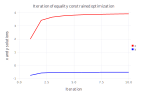

In [8]:
plot(layer(x=1:10,y=parM[1:10,1],Geom.line,Theme(default_color=colorant"red",line_width=2px)),
layer(x=1:10,y=parM[1:10,2],Geom.line,Theme(default_color=colorant"blue",line_width=2px)),
Guide.title("Iteration of equality constrained optimization"),
Guide.xlabel("Iteration"),
Guide.ylabel("x and y solutions"),
Guide.manual_color_key(" ",["x","y"],["red", "blue"])
)

In [9]:

println("\nRestricted optima")
par0 = [100.0;100.0]
par1 = [0;0]
parMb = fill(NaN,(500,2))
i = 1
while maximum(abs(par1-par0)) > 1e-4
  par0 = par1 + 0.0
  rho = (i-1)*2
  Sol = optimize(p->objfun3(p,rho),par0)
  par1 = Optim.minimizer(Sol)
  println("iteration: $i, rho: $rho ",round(par1,4))
  parMb[i,:] = par1
  i = i + 1
end


Restricted optima
iteration: 1, rho: 0 [2.0,-0.75]
iteration: 2, rho: 2 [3.4285,-0.5714]
iteration: 3, rho: 4 [3.6667,-0.5417]
iteration: 4, rho: 6 [3.7647,-0.5294]
iteration: 5, rho: 8 [3.8181,-0.5227]
iteration: 6, rho: 10 [3.8519,-0.5185]
iteration: 7, rho: 12 [3.875,-0.5156]
iteration: 8, rho: 14 [3.8919,-0.5135]
iteration: 9, rho: 16 [3.9048,-0.5119]
iteration: 10, rho: 18 [3.9149,-0.5106]
iteration: 11, rho: 20 [3.9231,-0.5096]
iteration: 12, rho: 22 [3.9299,-0.5088]
iteration: 13, rho: 24 [3.9355,-0.5081]
iteration: 14, rho: 26 [3.9403,-0.5075]
iteration: 15, rho: 28 [3.9445,-0.507]
iteration: 16, rho: 30 [3.948,-0.5065]
iteration: 17, rho: 32 [3.9512,-0.5061]
iteration: 18, rho: 34 [3.954,-0.5058]
iteration: 19, rho: 36 [3.9565,-0.5054]
iteration: 20, rho: 38 [3.9588,-0.5051]
iteration: 21, rho: 40 [3.9608,-0.5049]
iteration: 22, rho: 42 [3.9626,-0.5047]
iteration: 23, rho: 44 [3.9643,-0.5045]
iteration: 24, rho: 46 [3.9658,-0.5043]
iteration: 25, rho: 48 [3.9672,-0.5041]
iter

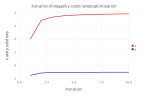

In [10]:
plot(layer(x=1:10,y=parMb[1:10,1],Geom.line,Theme(default_color=colorant"red",line_width=2px)),
layer(x=1:10,y=parMb[1:10,2],Geom.line,Theme(default_color=colorant"blue",line_width=2px)),
Guide.title("Iteration of inequality constrained optimization"),
Guide.xlabel("Iteration"),
Guide.ylabel("x and y solutions"),
Guide.manual_color_key(" ",["x","y"],["red", "blue"])
)